In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/dataSource/Combined Survey+Web review.xlsx')

In [3]:
df.head()

,Survey ID,Product Name,Print Customer Region,LTR,Overall Satisfaction,Setup Success,Finding the right printer,Buying the printer,Setting up the printer,Using the printer,...,HP+ Benefits Awareness Timing,HP+ Requirements Awareness Timing,Combined Text,predicted_level1,predicted_aspect,predicted_level2,predicted_probabilities,Ink Supply Type,Ink cartridge number,length
0,361293122,HP DeskJet 3755 All-in-One Printer,US,1,1.0,Without help,1.0,3.0,3.0,3.0,...,NaN,NaN,I purchased this mainly for the color printer....,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.786874,Home-based Printer Ink,NaN,77
1,361652520,HP OfficeJet Pro 8025e All-in-One Printer,US,10,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Works will with no issues. Prints in color and...,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.780252,Office Printer Ink,NaN,143
2,361631217,HP DeskJet 2752e All-in-One Printer,US,5,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,The issue with the printing block when one car...,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.711924,Home-based Printer Ink,NaN,157
3,361420152,HP DeskJet 2752e All-in-One Printer,US,7,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,I don’t print much. Everything I print is usua...,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.701721,Home-based Printer Ink,NaN,168
4,361490951,HP DeskJet 2755e All-in-One Printer,US,5,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Printer stopped printing the black color.,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.835999,Home-based Printer Ink,NaN,41


In [4]:
df2 = df.drop_duplicates(subset = 'Survey ID')[['LTR', 'Star Rating', 'Review Source', 'Supplies Family', 'Printer Family', 'Combined Text', 'Ink Supply Type', 'Month of Response Date', 'Age Range', 'Gender']]
df2['Month of Response Date'] = pd.to_datetime(df2['Month of Response Date'])
df2 = df2[df2['Month of Response Date'] < '2024-04-01']

In [5]:
startEndPeriods_df = pd.concat([df2.sort_values(by = 'Month of Response Date')['Month of Response Date'].dt.strftime('%B %Y').head(1),
                                df2.sort_values(by = 'Month of Response Date')['Month of Response Date'].dt.strftime('%B %Y').tail(1)], axis =0)
startEndPeriods_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/sandbox/streamlitProcessing/generatedCSVs/startEndPeriods.csv", index = False)
startEndPeriods_df

0        January 2024
57783      March 2024
Name: Month of Response Date, dtype: object

In [6]:
startPeriod_str = startEndPeriods_df.head(1).reset_index()['Month of Response Date'][0]
endPeriod_str = startEndPeriods_df.tail(1).reset_index()['Month of Response Date'][0]

In [7]:
df2.loc[(df2['Review Source'].notnull()) & (df2['Review Source'].str.contains('amazon', case = False)), 'Review Source'] = 'Amazon'
reviewSource_df = df2.groupby('Review Source').count().reset_index()
reviewSource_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/sandbox/streamlitProcessing/generatedCSVs/reviewSource.csv", index = False)
reviewSource_df

,Review Source,LTR,Star Rating,Supplies Family,Printer Family,Combined Text,Ink Supply Type,Month of Response Date,Age Range,Gender
0,Amazon,3968,3968,3968,0,3968,3968,3968,0,0
1,HP US,420,420,420,0,420,420,420,0,0
2,Office Depot,482,482,482,0,482,482,482,0,0
3,Staples,690,690,690,0,690,690,690,0,0
4,Walmart,1024,1024,1024,0,1024,1024,1024,0,0


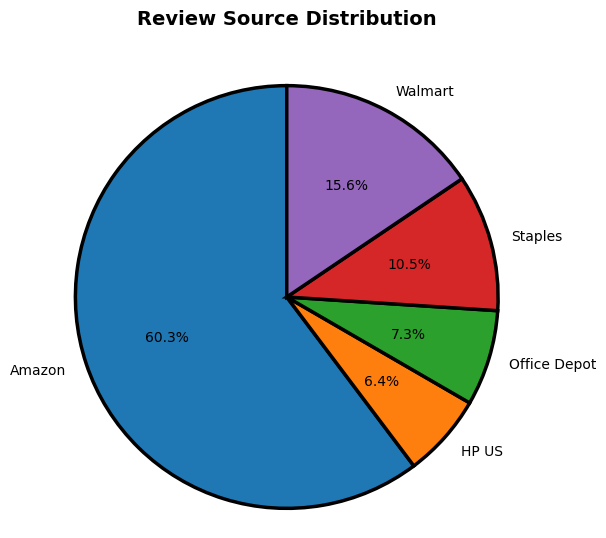

In [8]:
# Extract labels and values from the DataFrame
labels = reviewSource_df['Review Source']
sizes = reviewSource_df['LTR']

# Calculate the total n value
total_value = sum(sizes)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops=dict(edgecolor='black', linewidth = 2.5)  # Outline pie slices with black border
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title with the total n value, bold font, and higher position
plt.title(f"Review Source Distribution", 
          fontsize=14, fontweight='bold', pad=30)

# Display the pie chart
plt.show()

In [9]:
inkSupply_df = df2.groupby('Ink Supply Type').count().reset_index()
inkSupply_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/sandbox/streamlitProcessing/generatedCSVs/inkSupply.csv", index = False)
inkSupply_df

,Ink Supply Type,LTR,Star Rating,Review Source,Supplies Family,Printer Family,Combined Text,Month of Response Date,Age Range,Gender
0,Continuous Ink (Ink Tank),1654,0,0,1654,1654,1654,1654,1054,1051
1,Home-based Printer Ink,18125,4899,4899,18125,13226,18125,18125,7122,7107
2,Office Printer Ink,6478,1685,1685,6478,4793,6478,6478,2720,2712


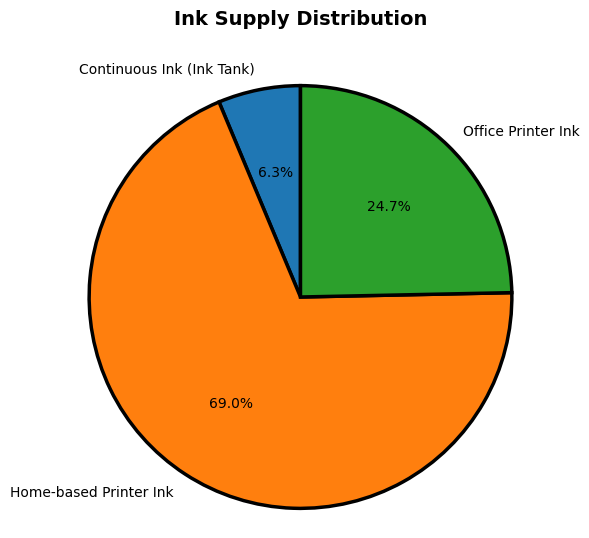

In [10]:
# Extract labels and values from the DataFrame
labels = inkSupply_df['Ink Supply Type']
sizes = inkSupply_df['LTR']

# Calculate the total n value
total_value = sum(sizes)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops=dict(edgecolor='black', linewidth = 2.5)  # Outline pie slices with black border
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title with the total n value, bold font, and higher position
plt.title(f"Ink Supply Distribution", 
          fontsize=14, fontweight='bold', pad=30)

# Display the pie chart
plt.show()

In [11]:
df2['Supplies Family'] = df2['Supplies Family'].str.strip().str.title()
supplies_df = df2.groupby('Supplies Family').count().sort_values(ascending = False, by = 'Supplies Family').reset_index()
supplies_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/sandbox/streamlitProcessing/generatedCSVs/supplies.csv", index = False)
supplies_df

,Supplies Family,LTR,Star Rating,Review Source,Printer Family,Combined Text,Ink Supply Type,Month of Response Date,Age Range,Gender
0,Supernesta,337,199,199,138,337,337,337,86,86
1,Sayan,919,0,0,919,919,919,919,589,587
2,Rohan,79,79,79,0,79,79,79,0,0
3,Pyramid Refresh,622,621,621,1,622,622,622,1,1
4,Prohan,15,15,15,0,15,15,15,0,0
5,Poseidon,310,0,0,310,310,310,310,187,187
6,Pluto Plus,327,0,0,327,327,327,327,213,212
7,Obelisk,11220,1256,1256,9964,11220,11220,11220,5346,5337
8,Nocturne,143,0,0,143,143,143,143,81,81
9,Nesta+,293,293,293,0,293,293,293,0,0


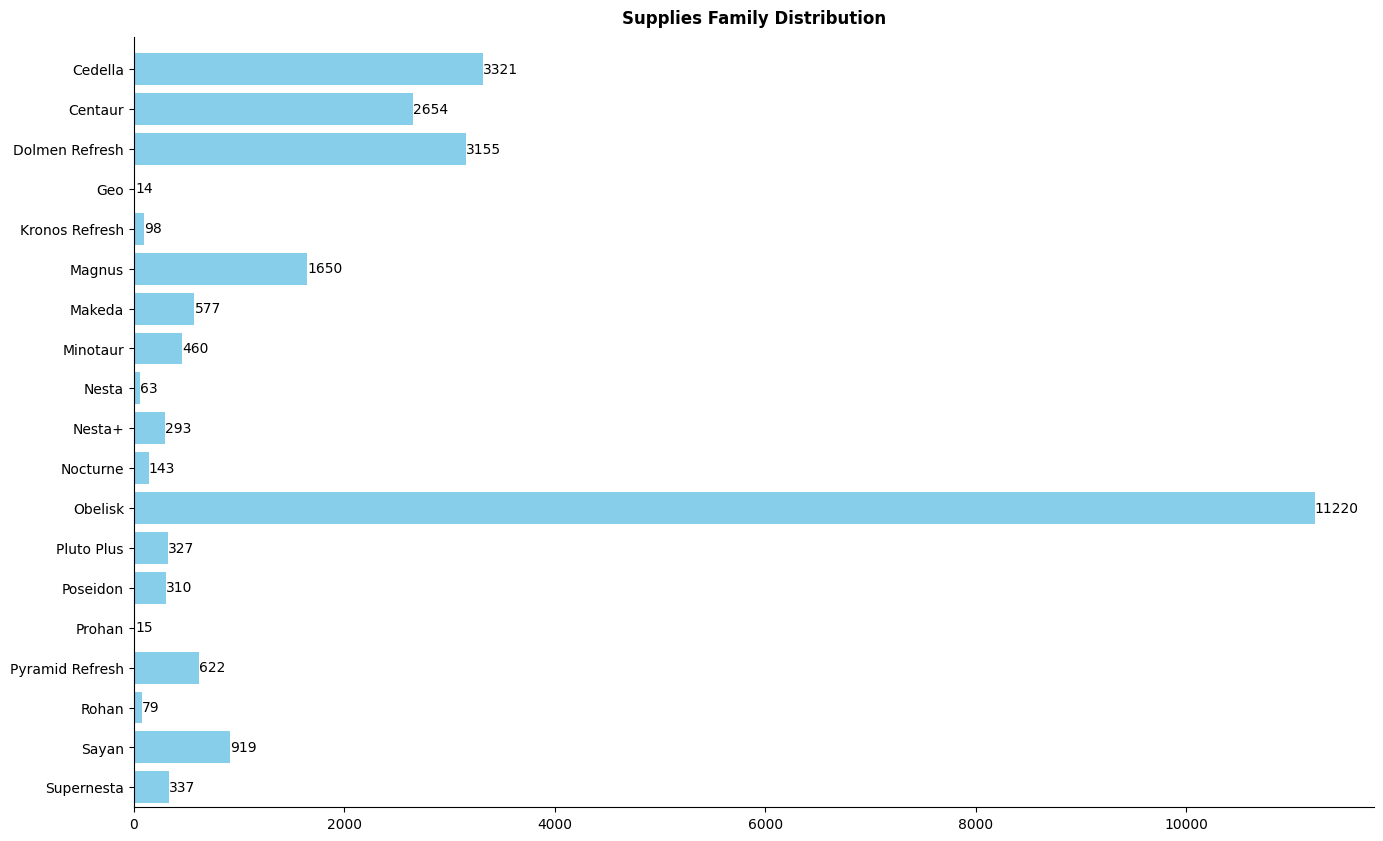

In [12]:
# Create horizontal bar chart
plt.figure(figsize=(16, 10))  # Set the figure size
ax = plt.barh(supplies_df['Supplies Family'], supplies_df['LTR'], color='skyblue')  # Create horizontal bars

# Add title
plt.title('Supplies Family Distribution', fontweight='bold', pad = 10)  # Title of the chart

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)  # Get current Axes and remove spines

# Add data values on top of each bar
for i in ax:
    plt.text(i.get_width(), i.get_y() + i.get_height()/2,  # Position the text
             str(i.get_width()),  # The value to display
             va='center',  # Center align vertically
             ha='left')  # Align the text to the left

# Adjust y-axis limits to remove gaps
plt.ylim(-0.5, len(supplies_df) - 0.2)  # Set limits to fit bars tightly

# Show the plot
plt.show()

In [13]:
df2['Printer Family'] = df2['Printer Family'].str.strip().str.title()
printer_df = df2.groupby('Printer Family').count().sort_values(ascending = False, by = 'Printer Family').reset_index()
printer_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/sandbox/streamlitProcessing/generatedCSVs/printer.csv", index = False)
printer_df

,Printer Family,LTR,Star Rating,Review Source,Supplies Family,Combined Text,Ink Supply Type,Month of Response Date,Age Range,Gender
0,Wudang Refresh,6,0,0,6,6,6,6,4,4
1,Wudang,3,0,0,3,3,3,3,1,1
2,Weber,57,0,0,57,57,57,57,33,33
3,Verona,254,0,0,254,254,254,254,130,129
4,Vasari Yeti,2941,0,0,2941,2941,2941,2941,1644,1639
5,Vasari,275,0,0,275,275,275,275,137,138
6,Topaz,3,0,0,3,3,3,3,3,3
7,Tassel Yeti,184,0,0,184,184,184,184,106,106
8,Tassel,24,0,0,24,24,24,24,10,10
9,Taiji,201,0,0,201,201,201,201,114,114


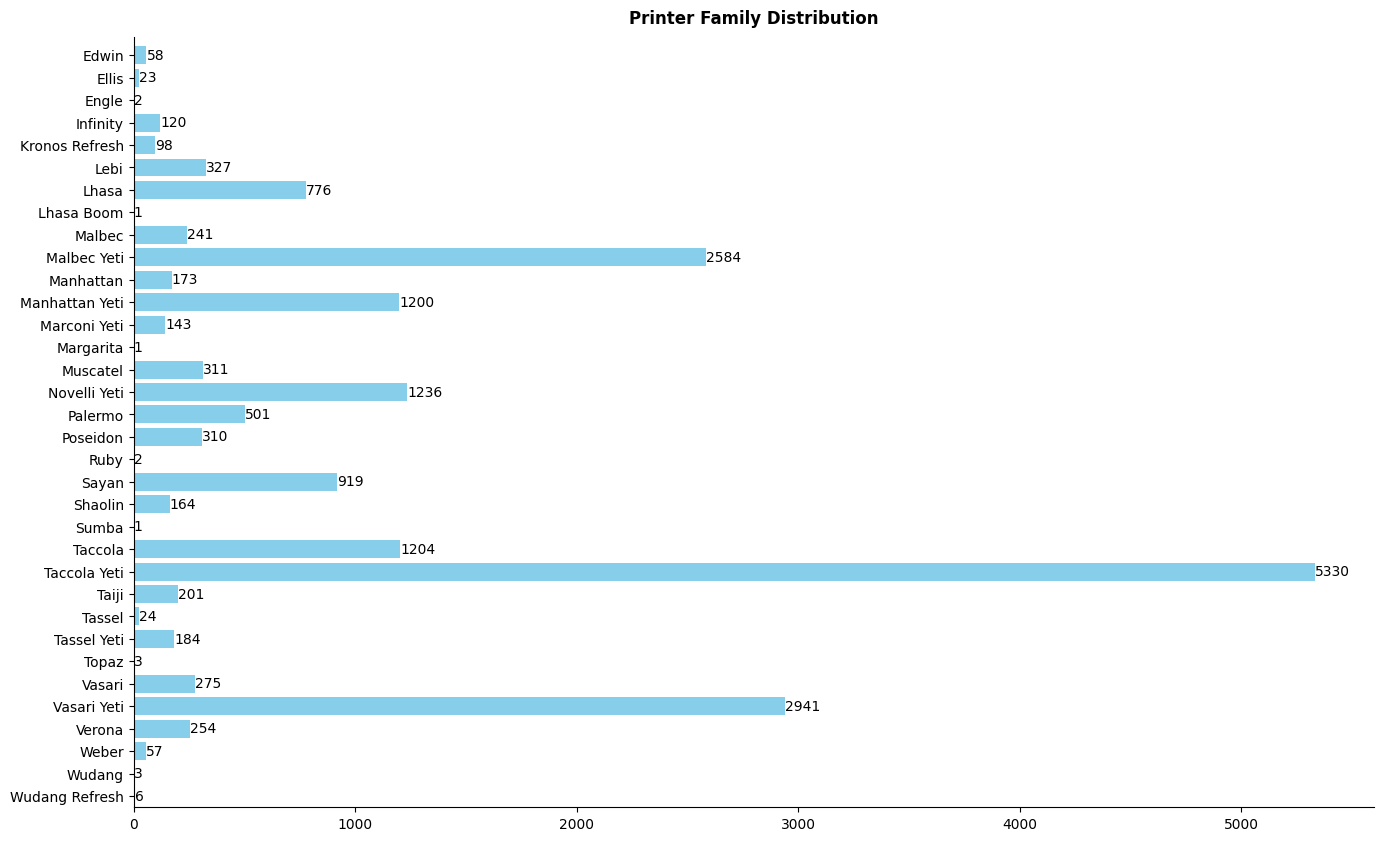

In [14]:
# Create horizontal bar chart
plt.figure(figsize=(16, 10))  # Set the figure size
ax = plt.barh(printer_df['Printer Family'], printer_df['LTR'], color='skyblue')  # Create horizontal bars

# Add title
plt.title('Printer Family Distribution', fontweight='bold', pad = 10)  # Title of the chart

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)  # Get current Axes and remove spines

# Add data values on top of each bar
for i in ax:
    plt.text(i.get_width(), i.get_y() + i.get_height()/2,  # Position the text
             str(i.get_width()),  # The value to display
             va='center',  # Center align vertically
             ha='left')  # Align the text to the left

# Adjust y-axis limits to remove gaps
plt.ylim(-0.5, len(printer_df) - 0.2)  # Set limits to fit bars tightly

# Show the plot
plt.show()

In [15]:
ageGender_df = df2[(df2['Age Range'].notnull()) & (df2['Gender'].notnull())][['Age Range', 'Gender']].reset_index(drop = True)
ageGender_df = ageGender_df[((ageGender_df.Gender == 'Male') | (ageGender_df.Gender == 'Female')) & (~(ageGender_df['Age Range'] == 'Prefer not to answer'))]
ageGender_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/sandbox/streamlitProcessing/generatedCSVs/ageGender.csv", index = False)
ageGender_df

,Age Range,Gender
0,51-65 years,Male
1,35-50 years,Male
2,51-65 years,Female
3,51-65 years,Male
4,51-65 years,Female
...,...,...
10857,35-50 years,Female
10858,Over 65 years,Male
10859,35-50 years,Female
10860,51-65 years,Female


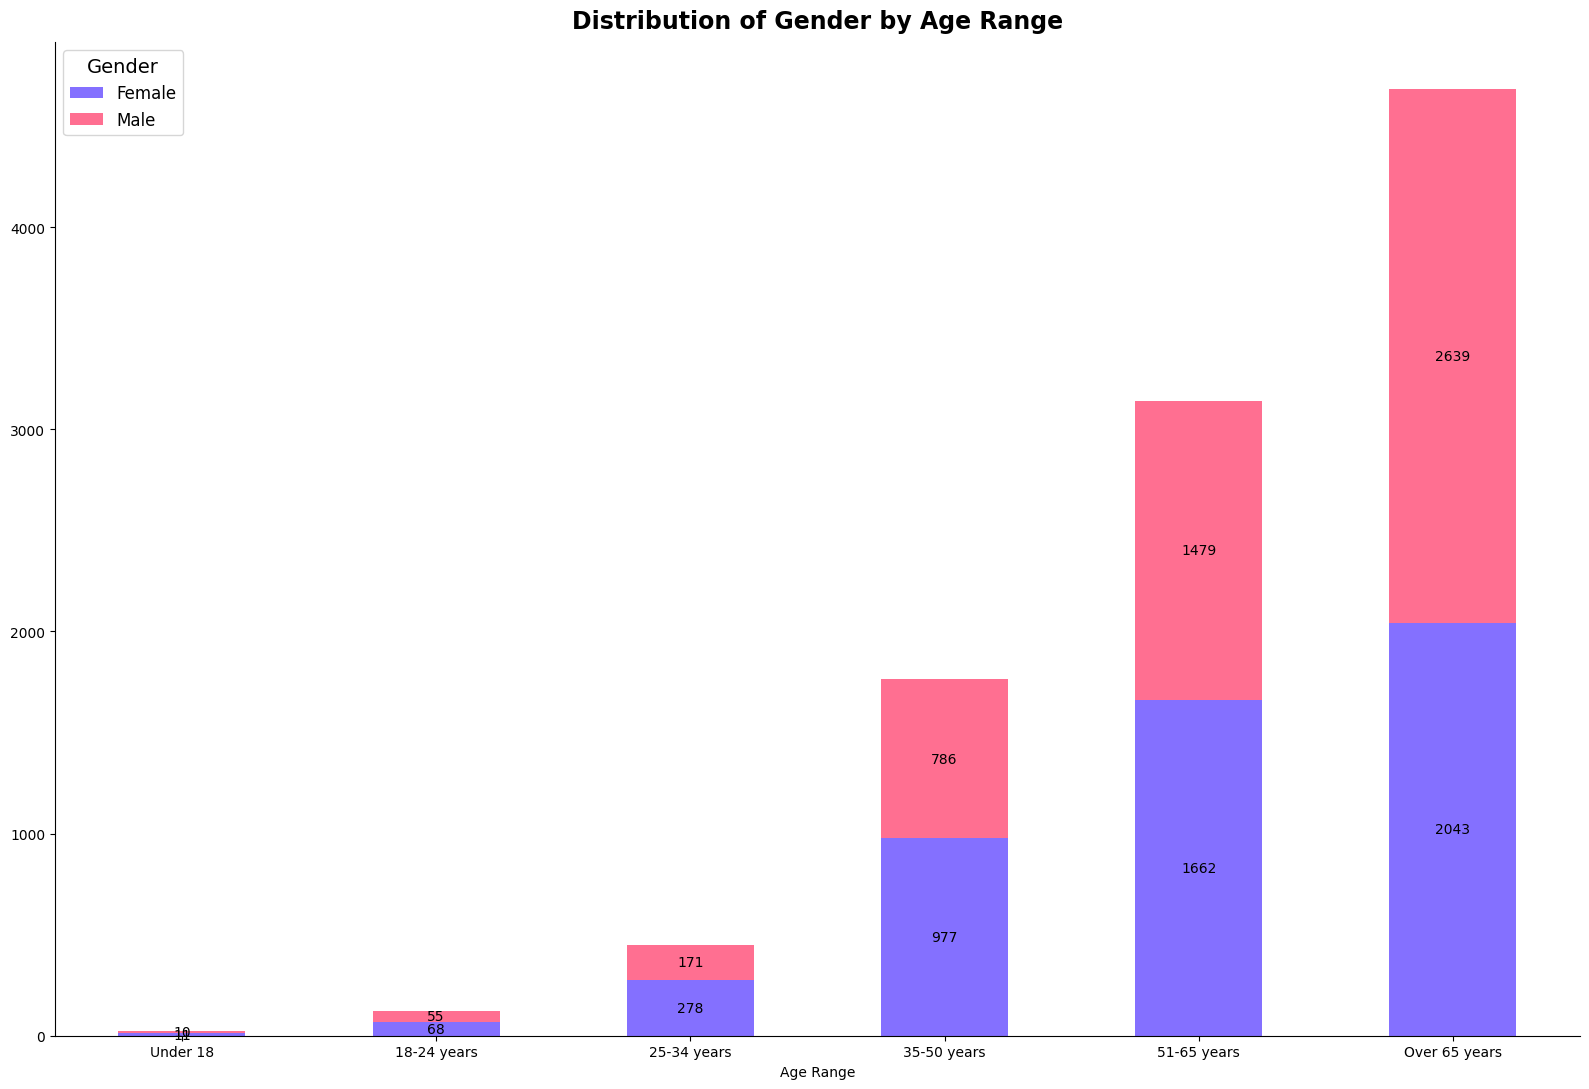

In [16]:
# Define the custom order for age ranges
age_order = ['Under 18', '18-24 years', '25-34 years', '35-50 years', '51-65 years', 'Over 65 years']

# Count occurrences of each Gender for each Age Range
age_gender_counts = ageGender_df.groupby(['Age Range', 'Gender']).size().unstack(fill_value=0)

# Reindex to ensure all categories are included
age_gender_counts = age_gender_counts.reindex(age_order, fill_value=0)

# Convert 'Age Range' to categorical with specified order
age_gender_counts.index = pd.CategoricalIndex(age_gender_counts.index, categories=age_order, ordered=True)

# Create the stacked bar chart
colors = ['#8470FF', '#FF6F91']  # Light blue and bright pink
ax = age_gender_counts.plot(kind='bar', stacked=True, figsize=(16, 11), color=colors)

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)  # Get current Axes and remove spines

# Add data labels in each bar segment
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y() + height / 2  # Center label vertically within segment
    ax.text(x + width / 2, y, f"{height:.0f}", ha='center', va='center', color='black', fontsize=10)

# Add labels and title
# plt.ylabel('Count')
# plt.xlabel('Age Range')
plt.title('Distribution of Gender by Age Range', fontweight='bold', fontsize=17, pad=10)  # Increase font size for title
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Gender', fontsize=12, title_fontsize='14')  # Increase font size for legend and title

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [17]:
def score_to_sentiment(row):
    if not pd.isna(row['LTR']):
        # Use LTR (0-10)
        if row['LTR'] <= 6:
            return 'Negative'
        else:
            return 'Positive'
    elif not pd.isna(row['Star Rating']):
        # Use Star Rating (1-5)
        if row['Star Rating'] <= 3:
            return 'Negative'
        else:
            return 'Positive'
    else:
        return 'Unknown'

sentiment_list = []
for index, row in df2.iterrows():
    sentiment_list.append(score_to_sentiment(row))
df2['sentiment'] = sentiment_list

sentimentTime_df = df2[df2.sentiment.isin(['Negative', 'Positive'])][['sentiment', 'Month of Response Date']]
sentimentTime_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/sandbox/streamlitProcessing/generatedCSVs/sentimentTime.csv", index = False)
sentimentTime_df

,sentiment,Month of Response Date
0,Negative,2024-01-01
1,Positive,2024-01-01
2,Negative,2024-01-01
3,Positive,2024-01-01
4,Negative,2024-01-01
...,...,...
57772,Positive,2024-03-01
57774,Negative,2024-03-01
57776,Negative,2024-03-01
57777,Negative,2024-03-01


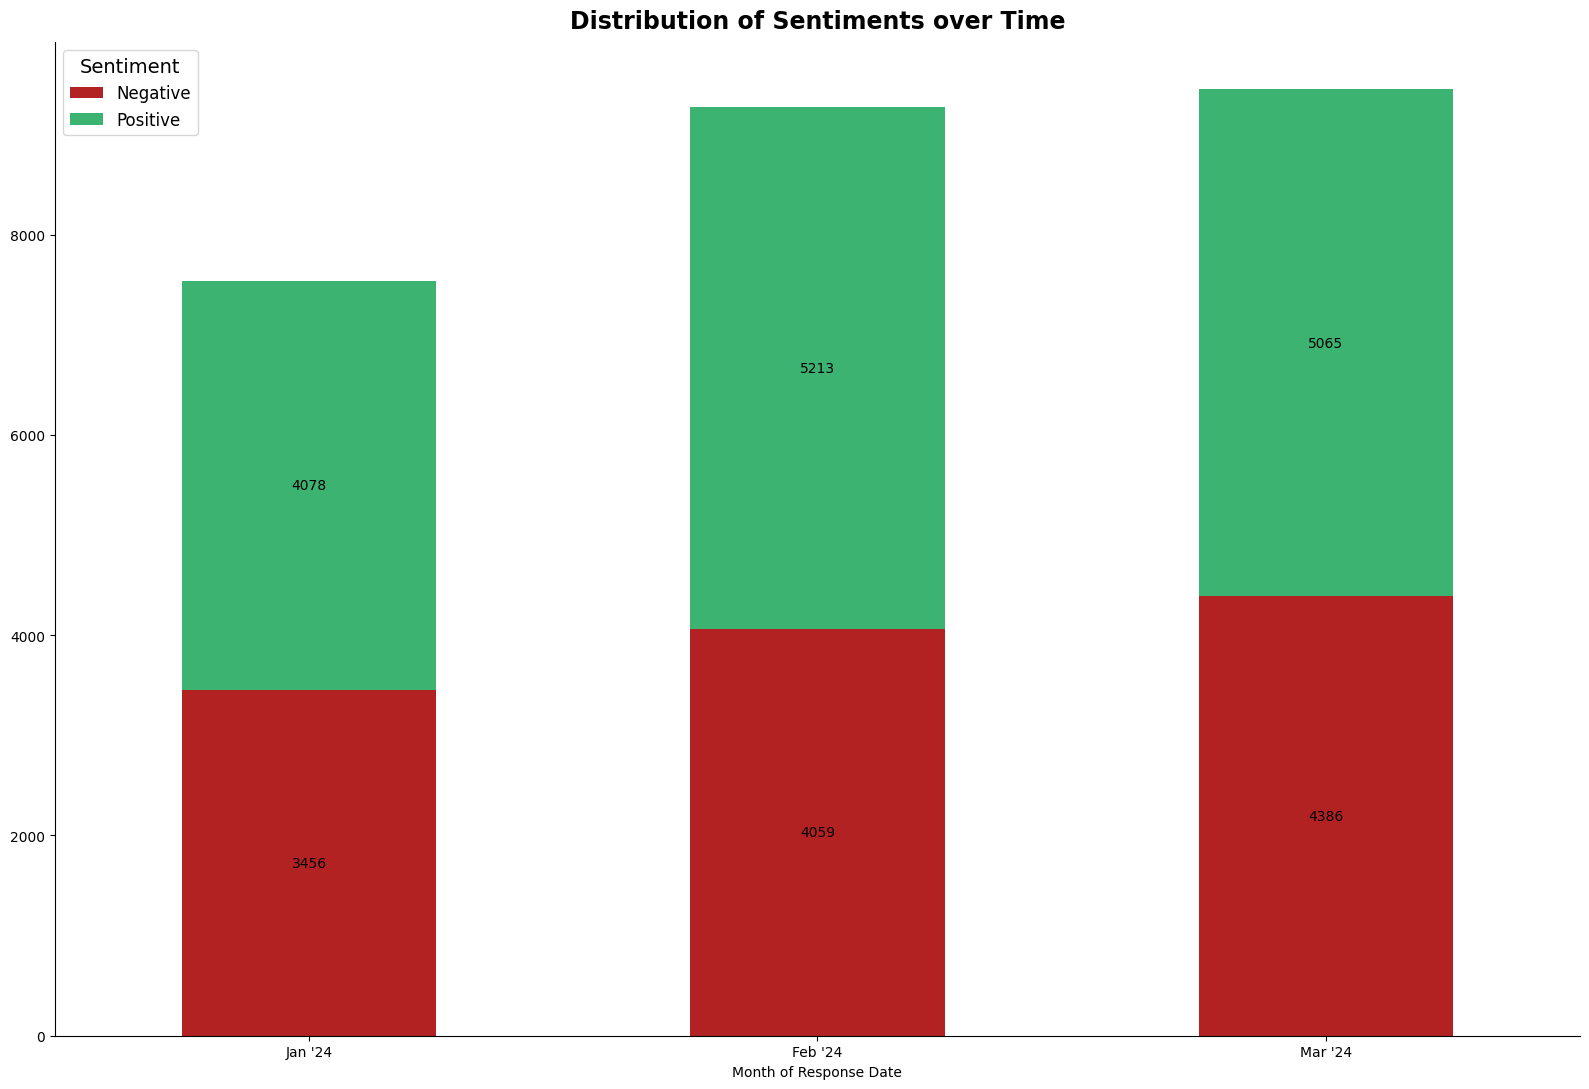

In [18]:
# Count occurrences
time_Sentiment_counts = sentimentTime_df.groupby(['Month of Response Date', 'sentiment']).size().unstack(fill_value=0)

# Format month index
time_Sentiment_counts.index = pd.to_datetime(time_Sentiment_counts.index).strftime("%b '%y")

# Create the stacked bar chart
colors = ['#B22222', '#3CB371']  # red and green
ax = time_Sentiment_counts.plot(kind='bar', stacked=True, figsize=(16, 11), color=colors)

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)

# Add data labels in each bar segment
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y() + height / 2  # Center label vertically within segment
    ax.text(x + width / 2, y, f"{height:.0f}", ha='center', va='center', color='black', fontsize=10)

# Add labels and title
plt.title('Distribution of Sentiments over Time', fontweight='bold', fontsize=17, pad=10)  # Increase font size for title
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Sentiment', fontsize=12, title_fontsize='14')  # Increase font size for legend and title

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()